<a href="https://colab.research.google.com/github/Luiz-Henrique05/titanic/blob/main/DevRapido_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="ticks")
plt.style.use("fivethirtyeight")

titanic_df = pd.read_csv('/content/titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


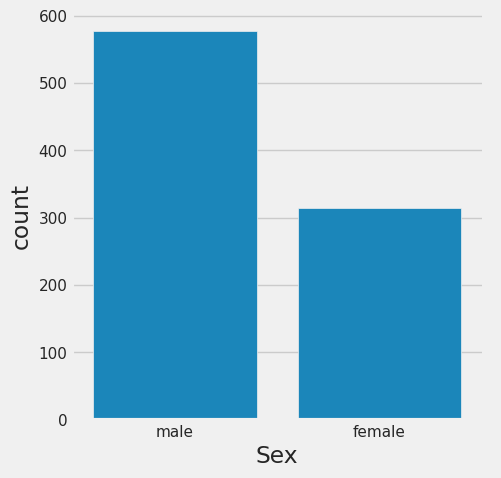

In [ ]:
sns.catplot(x='Sex', data=titanic_df, kind='count')

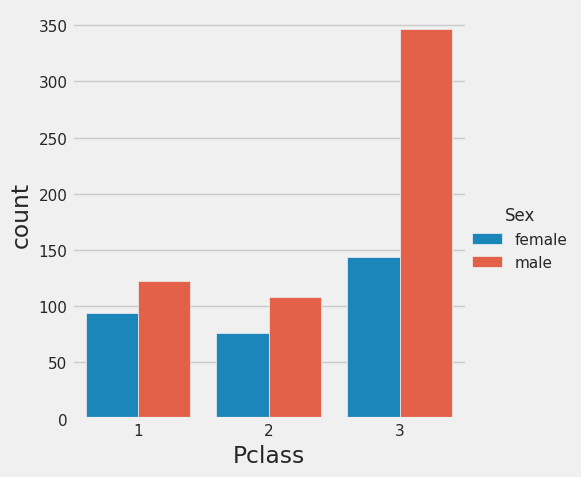

In [ ]:
sns.catplot(x='Pclass', data=titanic_df, hue='Sex', kind='count')

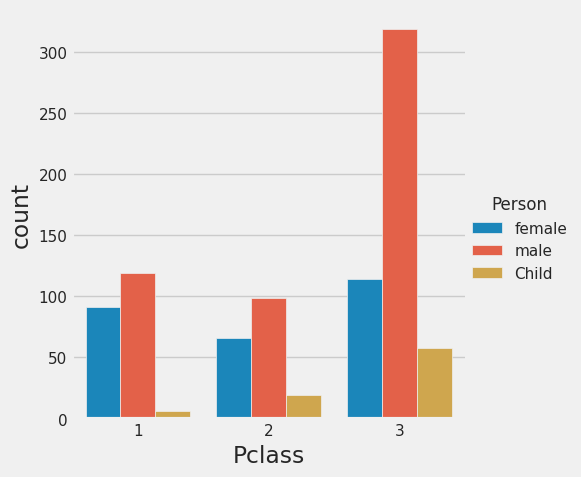

In [ ]:
sns.catplot(x='Pclass', data=titanic_df, hue='Person', kind='count')

<Axes: >

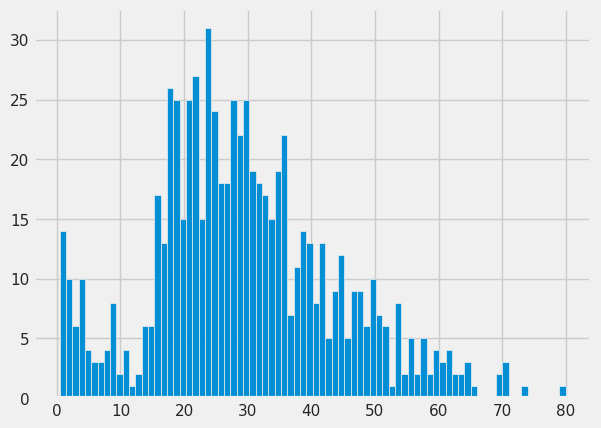

In [ ]:
# Visualizando a distribuição de idade
titanic_df.Age.hist(bins=80)

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


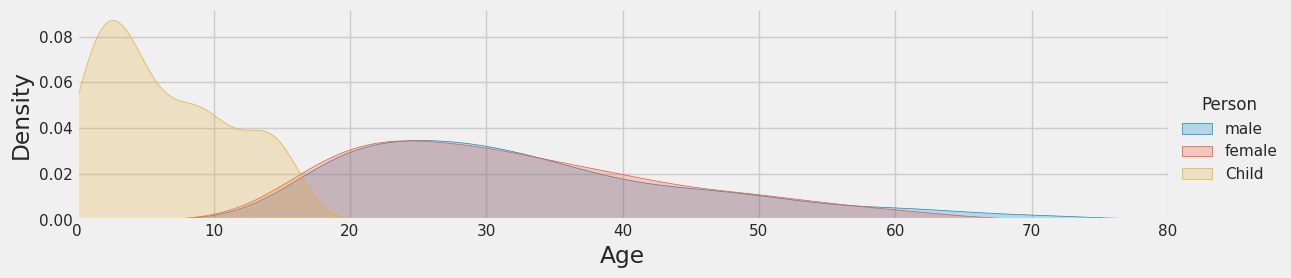

In [ ]:
fig = sns.FacetGrid(titanic_df, hue="Person",aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


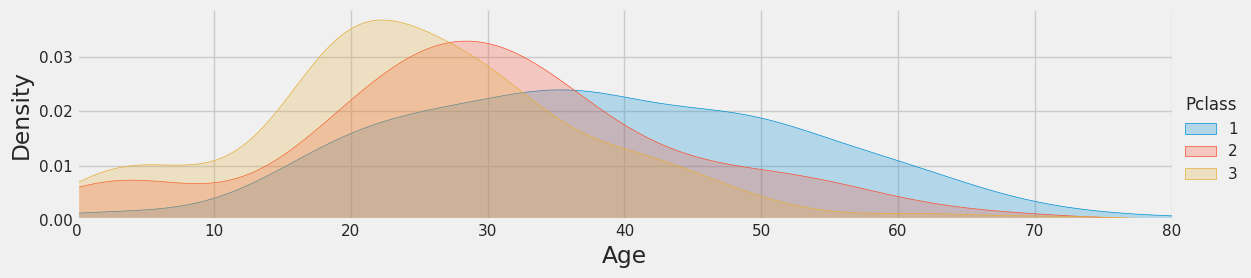

In [ ]:
fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

In [ ]:
deck = titanic_df['Cabin'].dropna()
deck

,Cabin
1,C85
3,C123
6,E46
10,G6
11,C103
...,...
871,D35
872,B51 B53 B55
879,C50
887,B42


<ipython-input-27-c426078a501a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Cabin', data=cabin_df, kind='count', palette='winter_d')


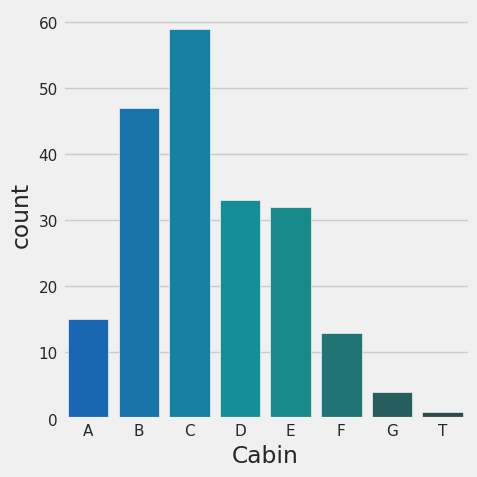

In [ ]:
# Pegue a letra correspondente ao nível do convés utilizando um loop for simples.
levels = []
for level in deck:
    levels.append(level[0])
cabin_df = pd.DataFrame(levels)
cabin_df.columns = ['Cabin']
cabin_df.sort_values(by='Cabin', inplace=True)
sns.catplot(x='Cabin', data=cabin_df, kind='count', palette='winter_d')

<ipython-input-29-1876ba7f870b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Cabin', data=cabin_df, kind='count', palette='summer')


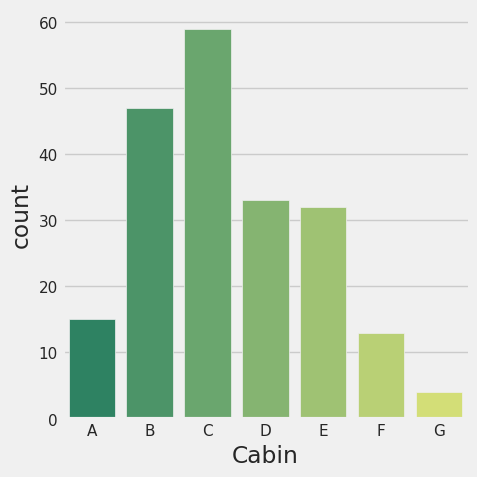

In [ ]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.catplot(x='Cabin', data=cabin_df, kind='count', palette='summer')

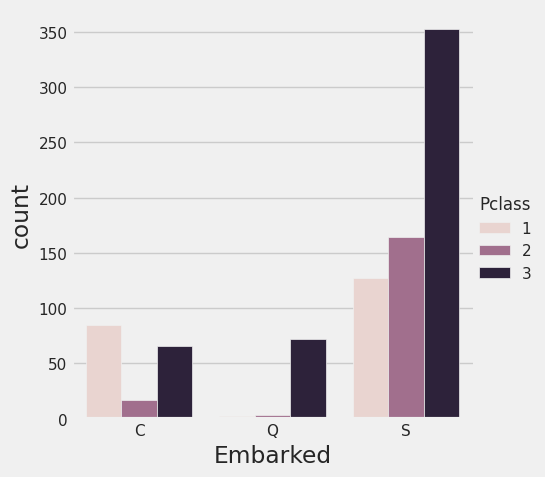

In [ ]:
# Agora é possível gerar rapidamente um factorplot para verificar os resultados;
# observe o argumento order, usado para lidar com valores NaN.
sns.catplot(x='Embarked', data=titanic_df, hue='Pclass', kind='count', order=['C', 'Q', 'S'])

In [ ]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
titanic_df.Alone

,Alone
0,1
1,1
2,0
3,1
4,0
...,...
886,0
887,0
888,3
889,0


In [ ]:
# Verifique por valores > 0 ou == 0 para definir o status de pessoa sozinha.
titanic_df.loc[titanic_df['Alone'] > 0, 'Alone'] = 'with Family'
titanic_df.loc[titanic_df['Alone'] == 0, 'Alone'] = 'Alone'
# Checando para verificar se funfou
titanic_df.head()

<ipython-input-32-7a41def5fffe>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'with Family' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  titanic_df.loc[titanic_df['Alone'] > 0, 'Alone'] = 'with Family'


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


<ipython-input-33-cf967df555fc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Alone', data=titanic_df, kind='count', palette='Blues',


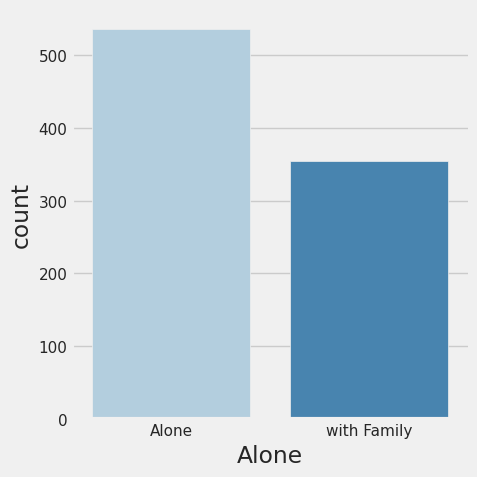

In [ ]:
sns.catplot(x='Alone', data=titanic_df, kind='count', palette='Blues',
            order=['Alone', 'with Family'])

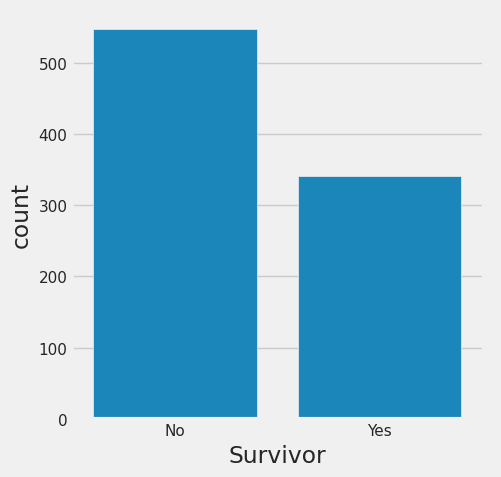

In [ ]:
# Começa criando uma nova coluna para fins de legibilidade por meio de mapeamento.
titanic_df['Survivor'] = titanic_df.Survived.map({0:'No', 1:'Yes'})
# Em seguida, obtém uma visão geral rápida entre sobreviventes e não sobreviventes.
sns.catplot(x='Survivor', data=titanic_df, kind='count')

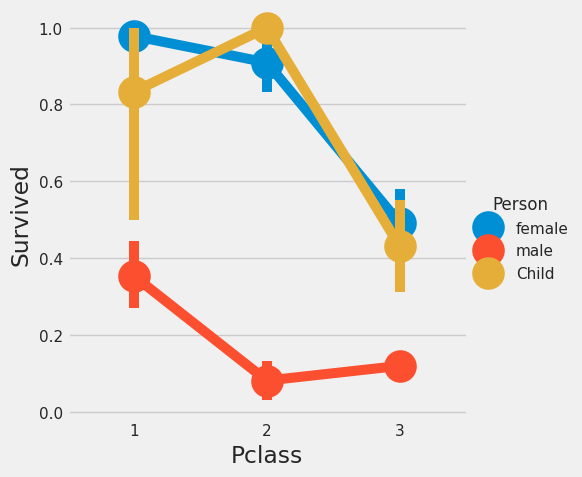

In [ ]:
# Utiliza novamente um factorplot, desta vez considerando classe e gênero.
sns.catplot(x='Pclass', y='Survived', data=titanic_df, hue='Person', kind='point')

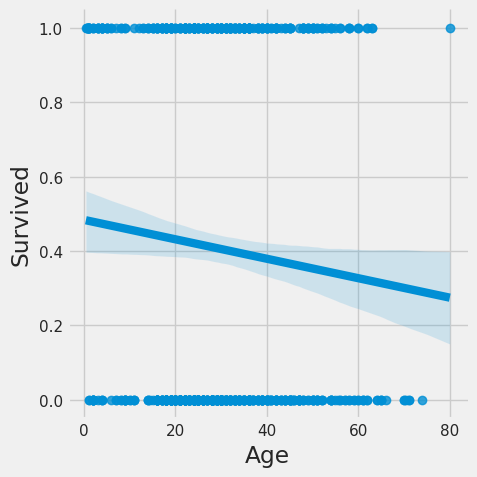

In [ ]:
# Utilize um gráfico linear para plotar idade e sobrevivência.
sns.lmplot(x='Age', y='Survived', data=titanic_df)

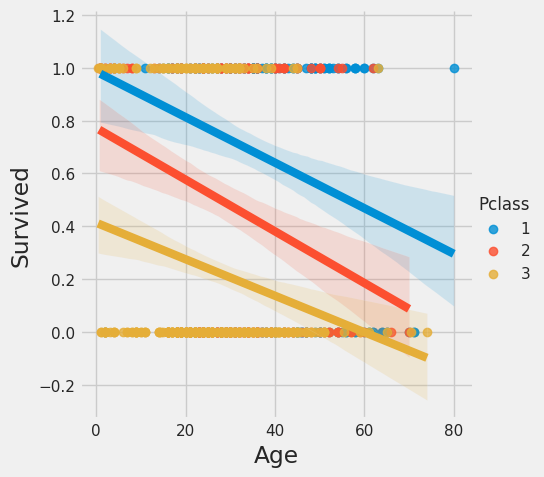

In [ ]:
# Relaciona idade e sobrevivência utilizando a tonalidade (hue) para separar por classe.
sns.lmplot(x='Age', y='Survived',hue='Pclass', data=titanic_df)

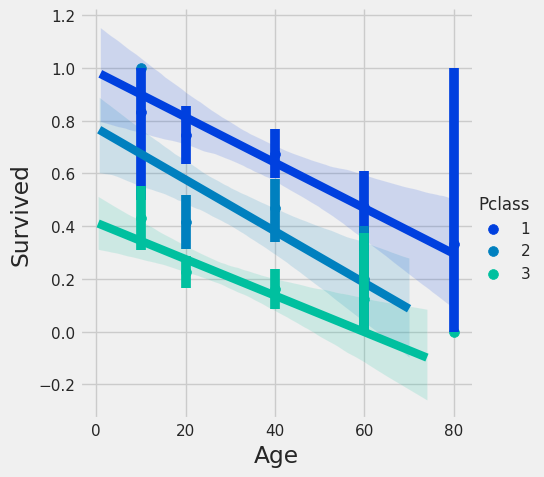

In [ ]:
generations = [10, 20, 40, 60, 80]
sns.lmplot(x='Age', y='Survived', hue='Pclass', data=titanic_df, palette='winter', x_bins=generations)

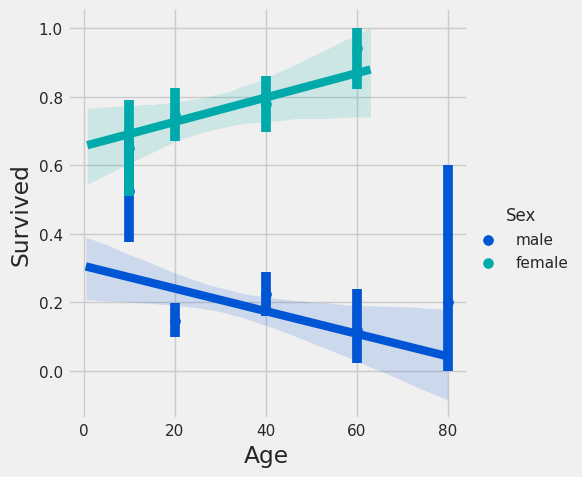

In [ ]:
sns.lmplot(x='Age', y='Survived', hue='Sex', data=titanic_df, palette='winter', x_bins=generations)

In [ ]:
# Cria uma nova coluna chamada 'Person' na qual toda pessoa com menos de 16 anos seja classificada como criança.
titanic_df['Person'] = titanic_df.Sex
titanic_df.loc[titanic_df['Age'] < 16, 'Person'] = 'Child'
# Checando a distribuição
print(f"Person categories : {titanic_df.Person.unique()}\n=================================")
print(f"Distribution of person : {titanic_df.Person.value_counts()}\n=================================")
print(f"Mean age : {titanic_df.Age.mean()}\n=================================")

Person categories : ['male' 'female' 'Child']
Distribution of person : Person
male      537
female    271
Child      83
Name: count, dtype: int64
Mean age : 29.69911764705882


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
grupos = ['Produto A', 'Produto B', 'Produto C']
valores = [1, 10, 100]